# 3-D 10 particles using Anderson Thermostat

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d
import math
from sympy import *
import random

In [5]:
import numpy as np
X = np.array([1,2,3])
Y = np.array([4,5,6])
Z = Y
Y = X
X = Z
Y -= X

print(Y)

[-3 -3 -3]


In [14]:
# functions 
def init(n,L,s,t):
    X = np.random.uniform(0.001,L,(n,3))
    V = np.zeros((n,3))
    H = np.zeros(s)
    KE = np.zeros(s)
    PE = np.zeros(s)
    PLTX = np.zeros(s)
    PLTV = np.zeros(s)
    return n, L, X, V, s, t, H, KE, PE, PLTX, PLTV

def pe(x):
    return 0.5*k*x*x

def ke_sys(V):
    return np.sum(V**2) * 0.5
    
def pe_sys(X):
    te = 0
    for l in X:
        te += pe(np.sqrt(np.sum((X-l)**2)))
    return te*0.5

def pbc(X,V,L):
    V[X >= L] *= -1
    V[X <= 0] *= -1

def Anderson(V,t,sigma,nu):
    prob_col = t*nu
    prob = np.random.uniform(0, 1, len(V))
    V[prob <= prob_col] = np.random.normal(0, sigma,3)
    V -= np.mean(V)
    
def Velocity_rescale(ke_T,V):
    v_scale = np.sqrt(ke_T/ke_sys(V))
    V *= v_scale
    V -= np.mean(V)
    
def Berendsen(ke_T,V,t,tau):
    v_scale = np.sqrt(1 + (t/tau)*((ke_T/ke_sys(V)) -1))
    V *= v_scale
    V -= np.mean(V)

In [15]:
# Force & PE calculations
k = 0.1
x = symbols('x')
f = pe(x)
force = diff(f, x)
F = lambdify(x, force)

In [16]:
# init
n,L,X,V,s,t,H,KE,PE,PLTV,PLTX = init(10,6,10000,0.01) # dict pass to object 

# Calculate some sigma for Anderson, sigma = square root of KbT, let KE = PE/3 at T and KE = 3/2 KbT
sigma = 0.1*np.sqrt((pe_sys(X)*2)/9)
nu = 7

# Berendsen & Velocity rescale, constant temp T lets assume the KE & tau for Berendsen 
ke_T = pe_sys(X)/4.5
tau = 10*t

# Propagator 
acc = np.zeros((n,3))
for l in X:
    acc -= F(X-l)
for j in range(s):
    KE[j] = ke_sys(V)
    PE[j] = pe_sys(X)
    PLTX[j] = X[0][0]
    PLTV[j] = V[0][0]
    X += t*V + 0.5*t*t*acc
    acc2 = np.zeros((n,3))
    for l in X:
        acc2 -= F(X-l)
    acc+=acc2
    V += 0.5*acc*t
    acc = acc2
    #Velocity_rescale(ke_T,V)
    #Anderson(V,t,sigma,nu)
    #Berendsen(ke_T,V,t,tau)
    pbc(X,V,L)
    

H = KE + PE

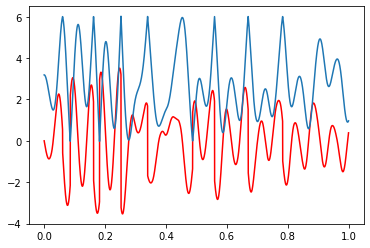

In [17]:
x1 = np.linspace(0, 1, s)
plt.plot(x1, PLTV,color='red')
plt.plot(x1, PLTX)

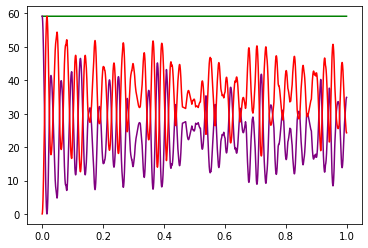

In [18]:
plt.plot(x1, H,color='green')
plt.plot(x1, PE,color='purple')
plt.plot(x1, KE, color='red')

In [410]:
# Plotting Function .plot for an object H/KE/PE/PS 
# Pip custom install

In [ ]:
# explicit energy function, force der, modular numpy array, X[123],V[123]
# propagator function 
# init X,V,n,L
# PBC condt
# Vectorized 
# Thermostat Berrenson, Andreson, Vel Rescale